Por favor, ignorar este primer apartado, es el código de ejemplo, la tarea comienza en celdas más abajo:

In [1]:
import numpy as np
from matplotlib import pylab as plt

In [2]:
def fun(x, y):
    return x + y

In [ ]:
X, Y = np.meshgrid(np.linspace(-1,2,100),np.linspace(-1,1,100))
Z = fun(X, Y)

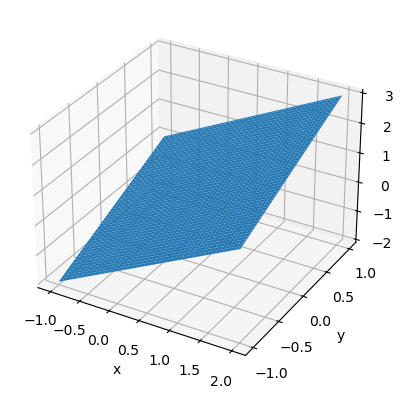

In [4]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot_surface(X, Y, Z)

ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()

In [5]:
lr = 0.1
niter = 15

In [6]:
init = np.array([1.5, 0.8])

approx = [init]
for iter in range(niter):
    approx.append(approx[-1] - lr * np.array([1, 1]))

approx = np.array(approx)

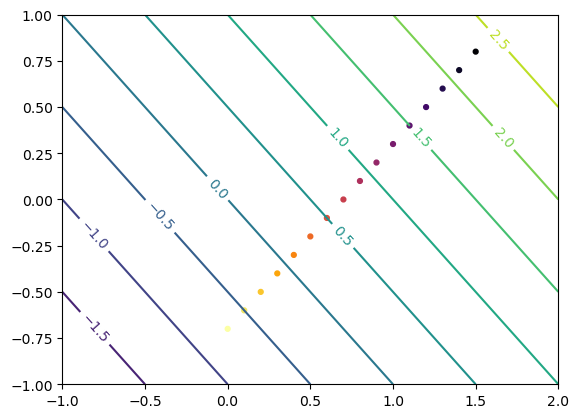

In [7]:
fig, ax = plt.subplots()

cp = ax.contour(X, Y, Z, levels=9)
ax.clabel(cp, cp.levels)
ax.scatter(approx[:,0], approx[:,1], s=12, c=np.arange(approx.shape[0]), cmap='inferno')

plt.show()

Para cada una de las funciones siguientes, calcule (a mano) el vector gradiente, todos los puntos crı́ticos y el mı́nimo global. Escribe el resultado en el notebook de entrega.

Primero, analizamos las funciones y calculamos todo lo necesario.
Para cada función, calculamos el gradiente, los puntos críticos y los mínimos globales (si existen).

Lo hacemos para cada función por separado, porque la última tiene valor absoluto, lo que requiere algo más de análisis por casos.

No usaremos el método de los multiplicadores de Lagrange, ya que no es necesario dadas las funciones del enunciado, además no hay restricciones a las funciones, por lo que podemos sólamente buscar máximos y mínimos globales analizando las derivadas parciales de primer y segundo orden, en este caso.

Función 1: \( f(x, y) = x^2 + y^2 \)

In [50]:
import sympy as sp

x, y = sp.symbols('x y', real=True)
f = x**2 + y**2
#Calculamos el gradiente
gradiente_f = [sp.diff(f, var) for var in (x, y)]
sol_f = sp.solve(gradiente_f, (x, y)) # Esto resuelve el sistema igualando cada gradiente a cero.

# Calculamos la matriz Hessiana:
hess_f = sp.hessian(f, (x, y))

# Evaluamos, usando la matriz Hessiana, el punto crítico obtenido:
hess_eval_f = hess_f.subs(sol_f)

print(f'La solución del sistema, igualando el gradiente a cero, nos da los puntos críticos {sol_f}')
print(f'El gradiente en el punto crítico es {gradiente_f}')
print(f'La matriz Hessiana es {hess_f}')
print(f'La matriz Hessiana evaluada en el punto crítico es {hess_eval_f}')


det_hess_f = hess_eval_f.det() # Hessiano evaluado en el punto crítico (a,b) = (0,0)
print(f'El determinante de la matriz Hessiana en el punto (0,0) es {det_hess_f}')

# Ahora, si el determinante es positivo, debemos evaluar la derivada parcial Fxx para ver si es positiva o negativa, asi sabemos si es min o max
# IMPORTANTE: Para poder determinar mediante el criterio del Hessiano (determinante de la matriz Hessiana),
# debemos tener segundas derivadas parciales continuas en el punto crítico de interés, lo que se cumple 
# en este caso, ya que Fxx = 2
if det_hess_f > 0:
    fxx = hess_f[0, 0].subs(sol_f) # Segunda derivada parcial respecto a x
    print('Derivada parcial respecto a x de segundo orden:', fxx)
    if fxx > 0:
        print('El punto crítico es un mínimo')
    else:
        print('El punto crítico es un máximo')
elif det_hess_f < 0:
    print('El punto crítico es un punto de silla')
elif det_hess_f == 0:
    print('No podemos determinar nada con este criterio') # Con Hessiano igual cero en el punto crítico

La solución del sistema, igualando el gradiente a cero, nos da los puntos críticos {x: 0, y: 0}
El gradiente en el punto crítico es [2*x, 2*y]
La matriz Hessiana es Matrix([[2, 0], [0, 2]])
La matriz Hessiana evaluada en el punto crítico es Matrix([[2, 0], [0, 2]])
El determinante de la matriz Hessiana en el punto (0,0) es 4
Derivada parcial respecto a x de segundo orden: 2
El punto crítico es un mínimo


Aquí, los puntos críticos son (0,0), y el mínimo global corresponde a f(0,0) = 0

**Punto crítico:** \( (0, 0) \)

**Hessiano:** \( H = \begin{bmatrix}2 & 0 \\ 0 & 2\end{bmatrix} \)

Como los autovalores son positivos, el punto es **mínimo local**. Como la función es convexa, es también **mínimo global**.

Función 2: \( g(x, y) = x^2 - y^2 \)
Esta función no es convexa. Se analizará con el Hessiano.

In [51]:
import sympy as sp

x, y = sp.symbols('x y', real=True)
g = x**2 - y**2

# Calculamos el gradiente
gradiente_g = [sp.diff(g, var) for var in (x, y)]
sol_g = sp.solve(gradiente_g, (x, y))  # Resolvemos el sistema igualando el gradiente a cero

# Calculamos la matriz Hessiana
hess_g = sp.hessian(g, (x, y))

# Evaluamos la matriz Hessiana en el punto crítico obtenido
hess_eval_g = hess_g.subs(sol_g)

print(f'La solución del sistema, igualando el gradiente a cero, nos da los puntos críticos {sol_g}')
print(f'El gradiente en el punto crítico es {gradiente_g}')
print(f'La matriz Hessiana es {hess_g}')
print(f'La matriz Hessiana evaluada en el punto crítico es {hess_eval_g}')

# Determinante de la matriz Hessiana
det_hess_g = hess_eval_g.det()
print(f'El determinante de la matriz Hessiana en el punto crítico es {det_hess_g}')

# Clasificamos el punto crítico con el criterio del Hessiano
if det_hess_g > 0:
    gxx = hess_g[0, 0].subs(sol_g)  # Segunda derivada parcial respecto a x
    print('Derivada parcial respecto a x de segundo orden:', gxx)
    if gxx > 0:
        print('El punto crítico es un mínimo')
elif det_hess_g < 0:
    print('El punto crítico es un punto de silla')
elif det_hess_g == 0:
    print('No podemos determinar nada con este criterio') # Con Hessiano igual cero en el punto crítico


La solución del sistema, igualando el gradiente a cero, nos da los puntos críticos {x: 0, y: 0}
El gradiente en el punto crítico es [2*x, -2*y]
La matriz Hessiana es Matrix([[2, 0], [0, -2]])
La matriz Hessiana evaluada en el punto crítico es Matrix([[2, 0], [0, -2]])
El determinante de la matriz Hessiana en el punto crítico es -4
El punto crítico es un punto de silla


Como vemos, el determinante de la matriz Hessiana en el punto crítico (0,0) es menor a cero, por lo que concluimos que se trata de un punto de silla, lo que no es un mínimo ni un máximo local.

**Punto crítico:** \( (0, 0) \)

**Hessiano:** \( H = \begin{bmatrix}2 & 0 \\ 0 & -2\end{bmatrix} \)

Autovalores con signos opuestos → **punto silla**.


Función 3: \( h(x, y) = x^4 - x^3 - 2x^2 + |y| \)
El valor absoluto requiere analizar por tramos:
 - Si \( y > 0 \Rightarrow |y| = y \)
 - Si \( y < 0 \Rightarrow |y| = -y \)
 - Si \( y = 0 \Rightarrow \frac{\partial h}{\partial y} \) no existe

In [52]:
import sympy as sp

x, y = sp.symbols('x y', real=True)

# Definimos las funciones por tramos, a causa del valor absoluto en la variable y
h_pos = x**4 - x**3 - 2*x**2 + y   # y > 0
h_neg = x**4 - x**3 - 2*x**2 - y   # y < 0

# Calculamos los gradientes
gradiente_h_pos = [sp.diff(h_pos, var) for var in (x, y)]
gradiente_h_neg = [sp.diff(h_neg, var) for var in (x, y)]

# Resolvemos los sistemas ∇h = 0
sol_h_pos = sp.solve(gradiente_h_pos, (x, y))
sol_h_neg = sp.solve(gradiente_h_neg, (x, y))

# Calculamos la matriz Hessiana (solo en x, ya que |y| no es derivable en y = 0)
hess_h = sp.hessian(x**4 - x**3 - 2*x**2, (x, y))

print(f'Puntos críticos para h(x, y) = x⁴ - x³ - 2x² + y (caso y > 0): {sol_h_pos}')
print(f'Gradiente para y > 0: {gradiente_h_pos}')
print(f'Puntos críticos para h(x, y) = x⁴ - x³ - 2x² - y (caso y < 0): {sol_h_neg}')
print(f'Gradiente para y < 0: {gradiente_h_neg}')
print(f'Matriz Hessiana común (sin término absoluto): {hess_h}')

# Evaluación de la matriz Hessiana en un punto crítico de ejemplo
ejemplo_punto = {x: -1, y: 0}
hess_eval_h = hess_h.subs(ejemplo_punto)
det_hess_h = hess_eval_h.det()

print(f'Matriz Hessiana evaluada en {ejemplo_punto}: {hess_eval_h}')
print(f'Determinante de la matriz Hessiana en {ejemplo_punto}: {det_hess_h}')

# Clasificación del punto crítico
if det_hess_h > 0:
    hxx = hess_h[0, 0].subs(ejemplo_punto)
    print('Derivada parcial respecto a x de segundo orden:', hxx)
    if hxx > 0:
        print('El punto crítico es un mínimo')
    else:
        print('El punto crítico es un máximo')
elif det_hess_h < 0:
    print('El punto crítico es un punto de silla')
elif det_hess_h == 0:
    print('No podemos determinar nada con este criterio') # Con Hessiano igual cero en el punto crítico


Puntos críticos para h(x, y) = x⁴ - x³ - 2x² + y (caso y > 0): []
Gradiente para y > 0: [4*x**3 - 3*x**2 - 4*x, 1]
Puntos críticos para h(x, y) = x⁴ - x³ - 2x² - y (caso y < 0): []
Gradiente para y < 0: [4*x**3 - 3*x**2 - 4*x, -1]
Matriz Hessiana común (sin término absoluto): Matrix([[12*x**2 - 6*x - 4, 0], [0, 0]])
Matriz Hessiana evaluada en {x: -1, y: 0}: Matrix([[14, 0], [0, 0]])
Determinante de la matriz Hessiana en {x: -1, y: 0}: 0
No podemos determinar nada con este criterio


**Punto crítico generalizado:** \( (-1, 0) \), obtenido en ambos tramos.

No es punto crítico clásico porque \( \partial h / \partial y \) no existe en \( y = 0 \).

El Hessiano evaluado en \( x = -1 \): \( H = \begin{bmatrix} 6 & 0 \\ 0 & 0 \end{bmatrix} \)

Tiene un valor propio nulo → el criterio es **inconcluso**.

2: Dibuje la gráfica de cada función

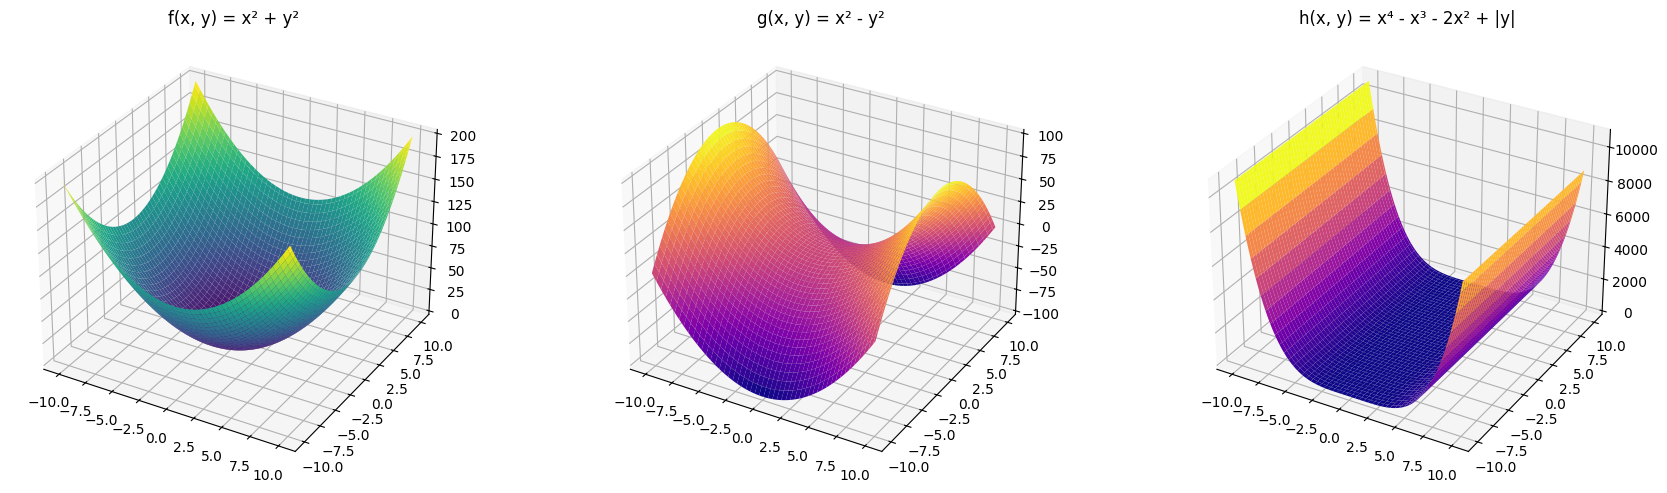

In [53]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 5))

x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
xg, yg = np.meshgrid(x_vals, y_vals)

# f(x, y) = x^2 + y^2
zf = xg**2 + yg**2
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(xg, yg, zf, cmap='viridis')
ax1.set_title("f(x, y) = x² + y²")

# g(x, y) = x^2 - y^2
zg = xg**2 - yg**2
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(xg, yg, zg, cmap='plasma')
ax2.set_title("g(x, y) = x² - y²")

# h(x, y) = x^4 - x^3 - 2x^2 + |y|
zh = xg**4 - xg**3 - 2*xg**2 + np.abs(yg)
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(xg, yg, zh, cmap='plasma')
ax3.set_title("h(x, y) = x⁴ - x³ - 2x² + |y|")

plt.tight_layout()
plt.show()


3. Dibuje (en otra figura) varias curvas de nivel para cada función.

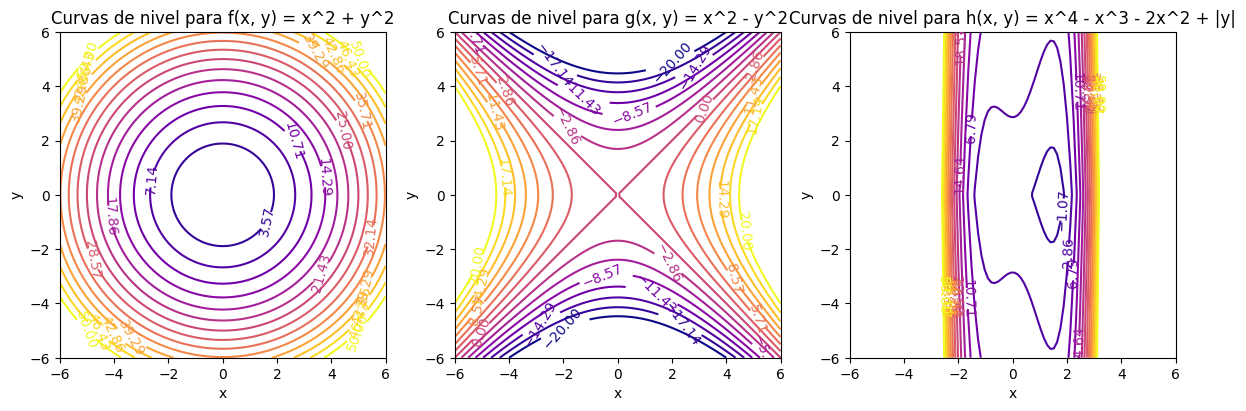

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Creamos un conjunto de 3 gráficos organizados horizontalmente:
fig, axes = plt.subplots(1, 3, figsize=(12, 10))

# Creamos la grilla o malla con 100 puntos para cada eje
# en el rango [-6, 6] para x e y:
x_vals = np.linspace(-6, 6, 100)
y_vals = np.linspace(-6, 6, 100)
xg, yg = np.meshgrid(x_vals, y_vals)

# ------ Primera gráfica: f(x, y) = x^2 + y^2 ------
zf = xg**2 + yg**2 # Calculamos los valores para cada punto de z = f(x,y)
niveles_f = np.linspace(0, 50, 15) # Arreglo con las n curvas de nivel (n=15) entre 0 y 50
#Recordar que axes[0] es el primer gráfico:
contour_f = axes[0].contour(xg, yg, zf, levels=niveles_f, cmap='plasma')
axes[0].clabel(contour_f, inline=True, fontsize=10)
axes[0].set_title("Curvas de nivel para f(x, y) = x^2 + y^2")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].set_aspect('equal', adjustable='box') # Asegura que los círculos se correctamente como círculos, 
# sin esto el gráfico se deforma de forma elíptica.

# ------ Segunda gráfica: g(x, y) = x^2 - y^2 ------
zg = xg**2 - yg**2
niveles_g = np.linspace(-20, 20, 15)
contour_g = axes[1].contour(xg, yg, zg, levels=niveles_g, cmap='plasma')
#Recordar que axes[1] es el segundo gráfico:
axes[1].clabel(contour_g, inline=True, fontsize=10)
axes[1].set_title("Curvas de nivel para g(x, y) = x^2 - y^2")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].set_aspect('equal', adjustable='box') # Asegura que los círculos se correctamente como círculos, 
# sin esto el gráfico se deforma de forma elíptica.

# ------ Tercera gráfica: h(x, y) = x^4 - x^3 - 2x^2 + |y| ------
zh = xg**4 - xg**3 - 2*xg**2 + np.abs(yg)
levels_h = np.linspace(-5, 50, 15)
contour_h = axes[2].contour(xg, yg, zh, levels=levels_h, cmap='plasma')
#Recordar que axes[2] es el tercer gráfico:
axes[2].clabel(contour_h, inline=True, fontsize=10)
axes[2].set_title("Curvas de nivel para h(x, y) = x^4 - x^3 - 2x^2 + |y|")
axes[2].set_xlabel("x")
axes[2].set_ylabel("y")
axes[2].set_aspect('equal', adjustable='box') # Asegura que los círculos se correctamente como círculos, 
# sin esto el gráfico se deforma de forma elíptica.

plt.tight_layout() # Ajusta el espaciado entre los gráficos
plt.show()

4. Dibuje todos los puntos crı́ticos que calcularon para cada función como
un marker en la figura anterior.

Si entendí bien este punto, hay que hacer un marker de cada punto crítico en la figura anterior de las curvas de nivel, así que los mostramos con un marker rojo:

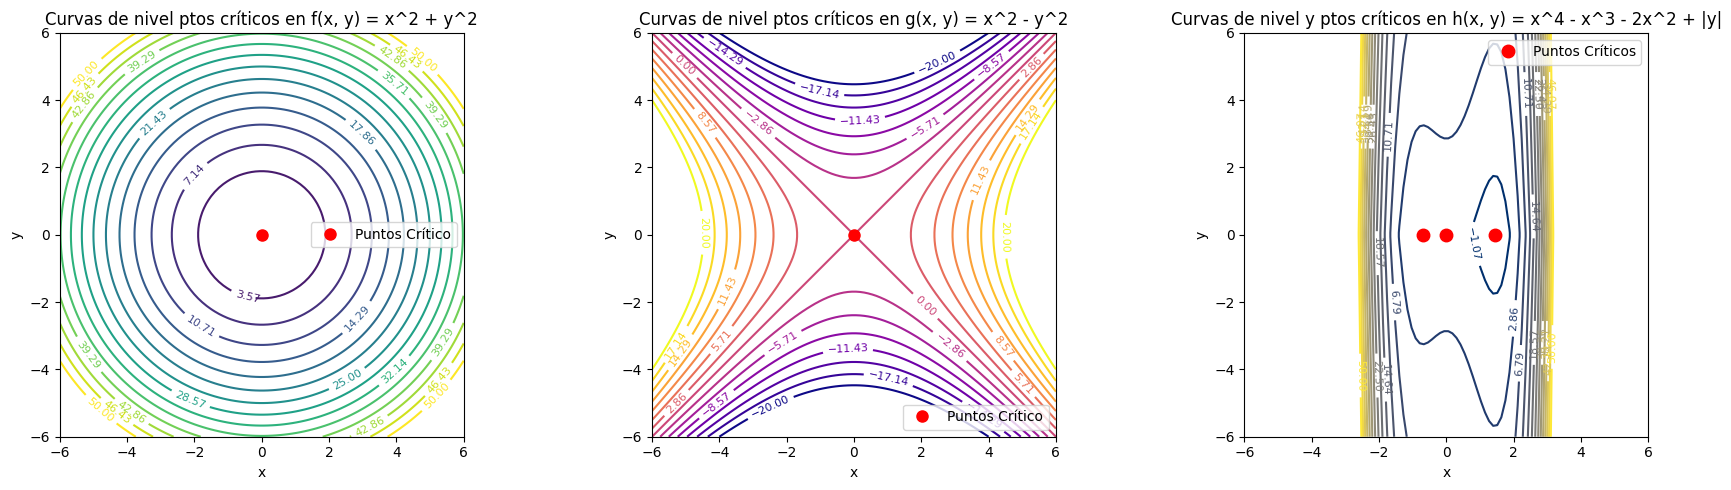

In [55]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

x_vals = np.linspace(-6, 6, 100)
y_vals = np.linspace(-6, 6, 100)
xg, yg = np.meshgrid(x_vals, y_vals)

# ------ Primera gráfica: f(x, y) = x^2 + y^2 ------
zf = xg**2 + yg**2
levels_f = np.linspace(0, 50, 15)
contour_f = axes[0].contour(xg, yg, zf, levels=levels_f, cmap='viridis')
axes[0].clabel(contour_f, inline=True, fontsize=8)
axes[0].set_title("Curvas de nivel ptos críticos en f(x, y) = x^2 + y^2")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].set_aspect('equal', adjustable='box')
# Punto crítico de f(x, y): (0, 0)
axes[0].plot(0, 0, 'ro', markersize=8, label='Puntos Crítico')
axes[0].legend()

# ------ Segunda gráfica: g(x, y) = x^2 - y^2 ------
zg = xg**2 - yg**2
levels_g = np.linspace(-20, 20, 15)
contour_g = axes[1].contour(xg, yg, zg, levels=levels_g, cmap='plasma')
axes[1].clabel(contour_g, inline=True, fontsize=8)
axes[1].set_title("Curvas de nivel ptos críticos en g(x, y) = x^2 - y^2")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].set_aspect('equal', adjustable='box')
# Punto crítico de g(x, y): (0, 0)
axes[1].plot(0, 0, 'ro', markersize=8, label='Puntos Crítico')
axes[1].legend()

# ------ Tercera gráfica: h(x, y) = x^4 - x^3 - 2x^2 + |y| ------
zh = xg**4 - xg**3 - 2*xg**2 + np.abs(yg)
levels_h = np.linspace(-5, 50, 15)
contour_h = axes[2].contour(xg, yg, zh, levels=levels_h, cmap='cividis')
axes[2].clabel(contour_h, inline=True, fontsize=8)
axes[2].set_title("Curvas de nivel y ptos críticos en h(x, y) = x^4 - x^3 - 2x^2 + |y|")
axes[2].set_xlabel("x")
axes[2].set_ylabel("y")
axes[2].set_aspect('equal', adjustable='box')

# Puntos críticos de la función h(x, y) en y = 0: (0, 0), ((3 + sqrt(73))/8, 0), ((3 - sqrt(73))/8, 0)
# usamos numpy:
critical_x_h = [0, (3 + np.sqrt(73)) / 8, (3 - np.sqrt(73)) / 8]
critical_y_h = [0, 0, 0]
axes[2].plot(critical_x_h, critical_y_h, 'ro', markersize=9, label='Puntos Críticos')
axes[2].legend()

plt.tight_layout()
plt.show()

5. Implemente el algoritmo de descenso de gradiente.

In [57]:
import sympy as sp # Usamos sympy por facilidad en los cálculos

# Definimos  las variables a usar
x, y = sp.symbols('x y', real=True)

# Ahora, definimos las funciones simbólicamente, para que funcione con la librería sympy:
f_sym = x**2 + y**2
g_sym = x**2 - y**2
# Para la función h, el gradiente se calcula en dos partes, ya que tiene un valor absoluto en el termino y:
h_sym_positivo = x**4 - x**3 - 2*x**2 + y
h_sym_negativo = x**4 - x**3 - 2*x**2 - y

# Aquí está el cálculo de los gradientes de las funciones:
grad_f_sym = sp.Matrix([sp.diff(f_sym, var) for var in (x, y)])
grad_g_sym = sp.Matrix([sp.diff(g_sym, var) for var in (x, y)])

grad_h_positivo_sym = sp.Matrix([sp.diff(h_sym_positivo, var) for var in (x, y)])
grad_h_negativo_sym = sp.Matrix([sp.diff(h_sym_negativo, var) for var in (x, y)])


# Función que realiza un solo paso del descenso de gradiente
def gradient_descent_step(func_sym, grad_sym, current_point, learning_rate):
    x_current, y_current = current_point
    gradient_eval = grad_sym.subs({x: x_current, y: y_current})
    gradient_eval = np.array([float(val.evalf()) for val in gradient_eval]) # Convertimos a float para evitar errores!
    next_point = np.array([x_current, y_current]) - learning_rate * gradient_eval
    return next_point

#Estas dos siguientes funciones son para el caso de la función h(x, y) = x^4 - x^3 - 2x^2 + |y|
def gradient_descent_step_abs_y(func_sym_pos, func_sym_neg, grad_sym_pos, grad_sym_neg, current_point, learning_rate):
    x_current, y_current = current_point
    if y_current >= 0:
        gradient_eval = grad_sym_pos.subs({x: x_current, y: y_current})
    else:
        gradient_eval = grad_sym_neg.subs({x: x_current, y: y_current})
    gradient_eval = np.array([float(val.evalf()) for val in gradient_eval])
    next_point = np.array([x_current, y_current]) - learning_rate * gradient_eval
    return next_point

def gradient_descent_abs_y(func_sym_pos, func_sym_neg, grad_sym_pos, grad_sym_neg, initial_point, learning_rate, n_iteraciones=1000):
    path = [np.array(initial_point)]
    current_point = np.array(initial_point)
    for _ in range(n_iteraciones):
        current_point = gradient_descent_step_abs_y(func_sym_pos, func_sym_neg, grad_sym_pos, grad_sym_neg, current_point, learning_rate)
        path.append(current_point)
    return np.array(path)

# Esta función jecuta el descenso de gradiente n cantidad de veces (iteraciones)
def gradient_descent(func_sym, grad_sym, initial_point, learning_rate, n_iteraciones=1000):
    path = [np.array(initial_point)]
    current_point = np.array(initial_point)
    for x in range(n_iteraciones):
        current_point = gradient_descent_step(func_sym, grad_sym, current_point, learning_rate)
        path.append(current_point)
    return np.array(path)

6. Ejecute el algoritmo para los casos siguientes:
a) f (x, y); γ = 0,01; a0 = (2; −1)
b) f (x, y); γ = 1; a0 = (2; −1)
c) f (x, y); γ = 1,01; a0 = (2; −1)
d) g(x, y); γ = 0,01; a0 = (1; 0)
e) g(x, y); γ = 0,01; a0 = (1; 0,01)
f) h(x, y); γ = 0,1; a0 = (−0,01; 0,5)

In [58]:
# Caso a) f(x, y); γ = 0.01; a0 = (2, -1)
learning_rate_a = 0.01
punto_inicial_a = (2, -1)
path_a = gradient_descent(f_sym, grad_f_sym, punto_inicial_a, learning_rate_a)
print(f"Caso a) Trayectoria (últimos 10 puntos):\n{path_a[-10:]}")

# Caso b) f(x, y); γ = 1; a0 = (2, -1)
learning_rate_b = 1
punto_inicial_b = (2, -1)
path_b = gradient_descent(f_sym, grad_f_sym, punto_inicial_b, learning_rate_b)
print(f"\nCaso b) Trayectoria (últimos 10 puntos):\n{path_b[-10:]}")

# Caso c) f(x, y); γ = 1.01; a0 = (2, -1)
learning_rate_c = 1.01
punto_inicial_c = (2, -1)
path_c = gradient_descent(f_sym, grad_f_sym, punto_inicial_c, learning_rate_c)
print(f"\nCaso c) Trayectoria (últimos 10 puntos):\n{path_c[-10:]}")

# Caso d) g(x, y); γ = 0.01; a0 = (1, 0)
learning_rate_d = 0.01
punto_inicial_d = (1, 0)
path_d = gradient_descent(g_sym, grad_g_sym, punto_inicial_d, learning_rate_d)
print(f"\nCaso d) Trayectoria (últimos 10 puntos):\n{path_d[-10:]}")

# Caso e) g(x, y); γ = 0.01; a0 = (1, 0.01)
learning_rate_e = 0.01
punto_inicial_e = (1, 0.01)
path_e = gradient_descent(g_sym, grad_g_sym, punto_inicial_e, learning_rate_e)
print(f"\nCaso e) Trayectoria (últimos 10 puntos):\n{path_e[-10:]}")

# Caso f) h(x, y); γ = 0.1; a0 = (-0.01, 0.5)
learning_rate_f = 0.1
initial_point_f = (-0.01, 0.5)
#path_f = gradient_descent(h_sym_positivo, grad_h_positivo_sym, initial_point_f, learning_rate_f, n_iteraciones=1000)
path_f = gradient_descent_abs_y(h_sym_positivo, h_sym_negativo, grad_h_positivo_sym, grad_h_negativo_sym, initial_point_f, learning_rate_f)

print(f"\nCaso f) Trayectoria (últimos 10 puntos):\n{path_f[-10:]}")

Caso a) Trayectoria (últimos 10 puntos):
[[ 4.03711394e-09 -2.01855697e-09]
 [ 3.95637166e-09 -1.97818583e-09]
 [ 3.87724423e-09 -1.93862211e-09]
 [ 3.79969935e-09 -1.89984967e-09]
 [ 3.72370536e-09 -1.86185268e-09]
 [ 3.64923125e-09 -1.82461563e-09]
 [ 3.57624663e-09 -1.78812331e-09]
 [ 3.50472169e-09 -1.75236085e-09]
 [ 3.43462726e-09 -1.71731363e-09]
 [ 3.36593471e-09 -1.68296736e-09]]

Caso b) Trayectoria (últimos 10 puntos):
[[-2.  1.]
 [ 2. -1.]
 [-2.  1.]
 [ 2. -1.]
 [-2.  1.]
 [ 2. -1.]
 [-2.  1.]
 [ 2. -1.]
 [-2.  1.]
 [ 2. -1.]]

Caso c) Trayectoria (últimos 10 puntos):
[[-6.66500089e+08  3.33250044e+08]
 [ 6.79830091e+08 -3.39915045e+08]
 [-6.93426693e+08  3.46713346e+08]
 [ 7.07295226e+08 -3.53647613e+08]
 [-7.21441131e+08  3.60720565e+08]
 [ 7.35869954e+08 -3.67934977e+08]
 [-7.50587353e+08  3.75293676e+08]
 [ 7.65599100e+08 -3.82799550e+08]
 [-7.80911082e+08  3.90455541e+08]
 [ 7.96529303e+08 -3.98264652e+08]]

Caso d) Trayectoria (últimos 10 puntos):
[[2.01855697e-09 0.0

Como comentario adicional del output de la celda anterior, podemos ver que hay comportamientos muy distintos según el "learning rate" que se le de al algoritmo, hay casos donde trayectoria de los puntos a medida que iteramos, causa oscilaciones (caso b), como también divergencias y convergencias.

7. Dibuje toda la secuencia de aproximaciones, junto a varias curvas de nivel.

Dibujamos la secuencia de aproximaciones como punto final e inicial del algoritmo, para así poder ver el "recorrido" de los puntos mencionados.

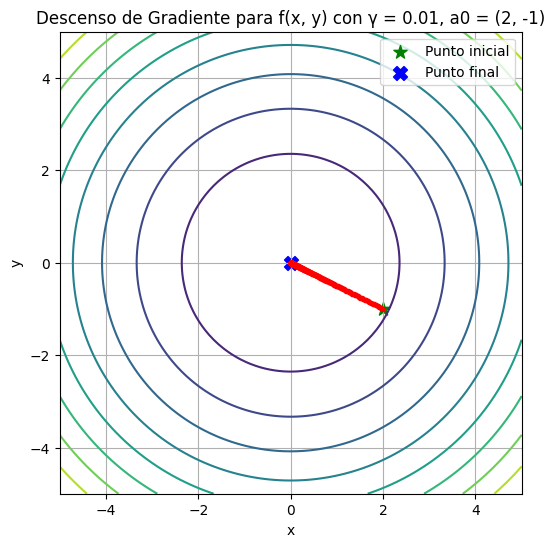

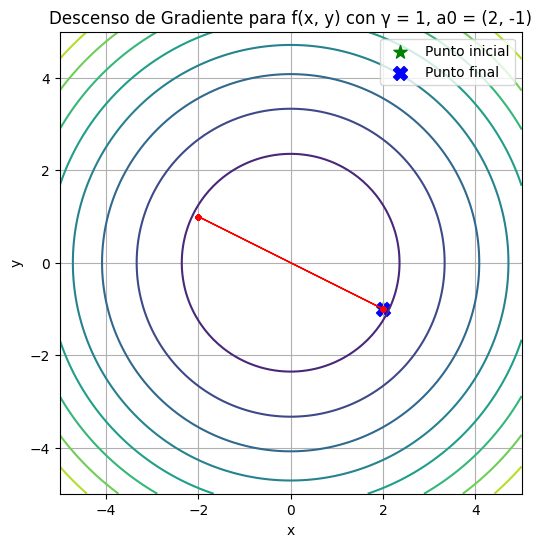

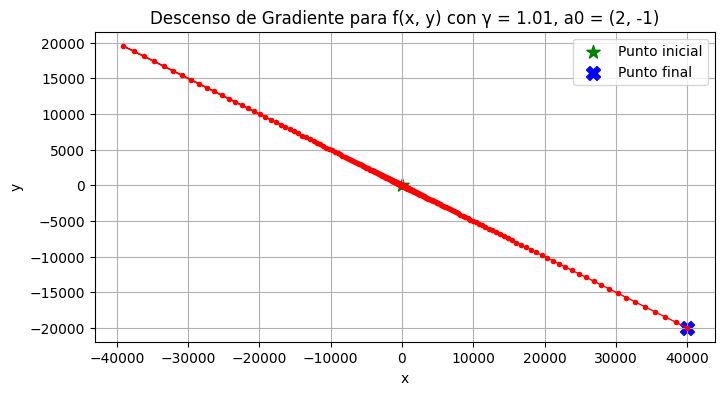

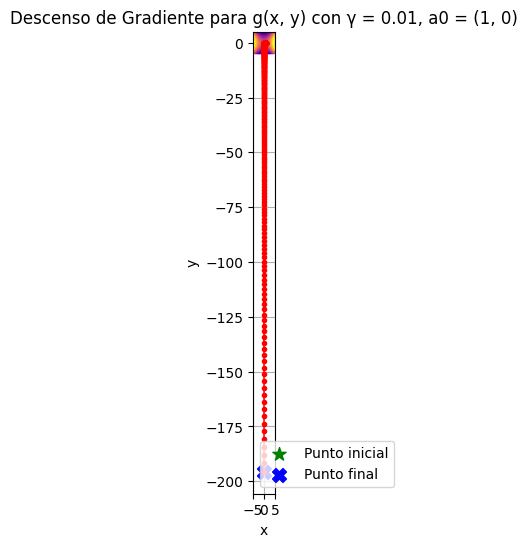

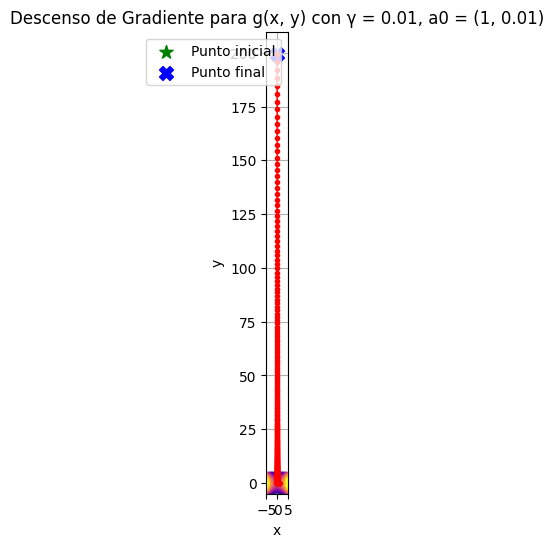

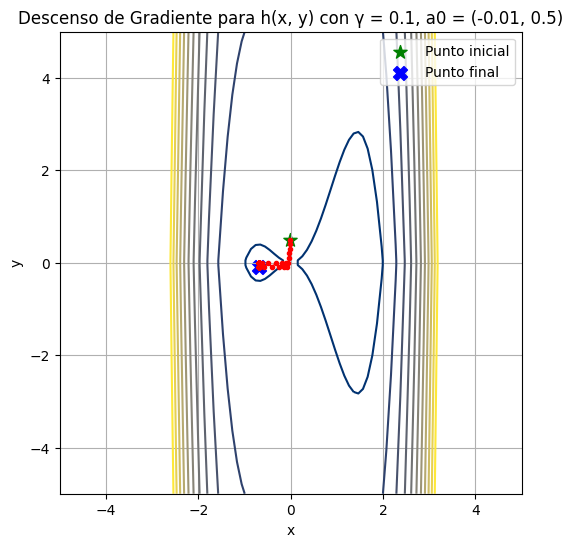

In [59]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x, y = sp.symbols('x y', real=True)

f_sym = x**2 + y**2
g_sym = x**2 - y**2
h_sym_pos = x**4 - x**3 - 2*x**2 + y
h_sym_neg = x**4 - x**3 - 2*x**2 - y
k_sym = x**4 - 7*x**3 - 14*x**2 - 8*x + y**2 # k_sym lo usaremos en el punto posterior.

# Aquí está el cálculo de los gradientes de las funciones:
grad_f_sym = sp.Matrix([sp.diff(f_sym, var) for var in (x, y)])
grad_g_sym = sp.Matrix([sp.diff(g_sym, var) for var in (x, y)])
grad_h_pos_sym = sp.Matrix([sp.diff(h_sym_pos, var) for var in (x, y)])
grad_h_neg_sym = sp.Matrix([sp.diff(h_sym_neg, var) for var in (x, y)])
grad_k_sym = sp.Matrix([sp.diff(k_sym, var) for var in (x, y)])

# Función especial para ejecutar el descenso de gradiente para h(x, y), ya que tiene valor absoluto:
def gradient_descent_h(grad_pos_sym, grad_neg_sym, initial_point, learning_rate, n_iterations=500):
    """***Ejecutamos el descenso de gradiente para la función h(x,y), considerando el valor absoluto***"""
    path = [np.array(initial_point)]
    current_point = np.array(initial_point)
    
    for iteration in range(n_iterations):
        x_current, y_current = current_point
        if y_current > 1e-9:
            gradient_eval = grad_pos_sym.subs({x: x_current, y: y_current})
        elif y_current < -1e-9:
            gradient_eval = grad_neg_sym.subs({x: x_current, y: y_current})
        else:
            grad_x = (4*x_current**3 - 3*x_current**2 - 4*x_current)
            grad_y = 0 # Subgradiente en y = 0, ya que no es derivable en ese punto.
            grad_y = 1 if y_current >= 0 else -1 # Subgradiente
            gradient_eval = sp.Matrix([grad_x, grad_y])

        # Aplicamos el aprendizaje con el learning rate
        current_point = current_point - learning_rate * np.array(gradient_eval).flatten()
        path.append(current_point)
    return np.array(path)

# Array con las funciones, sus gradientes, puntos iniciales y learning rates para graficar:
functions_data = [
    (f_sym, grad_f_sym, (2, -1), 0.01, "f(x, y)", "viridis"),
    (f_sym, grad_f_sym, (2, -1), 1, "f(x, y)", "viridis"),
    (f_sym, grad_f_sym, (2, -1), 1.01, "f(x, y)", "viridis"),
    (g_sym, grad_g_sym, (1, 0), 0.01, "g(x, y)", "plasma"),
    (g_sym, grad_g_sym, (1, 0.01), 0.01, "g(x, y)", "plasma"),
    (None, (grad_h_pos_sym, grad_h_neg_sym), (-0.01, 0.5), 0.1, "h(x, y)", "cividis"),
]

# Creamos la malla para graficar las curvas de nivel:
x_plot = np.linspace(-5, 5, 100)
y_plot = np.linspace(-5, 5, 100)
xg_plot, yg_plot = np.meshgrid(x_plot, y_plot)

# Recorremos el array de funciones y graficamos cada una de ellas:
for func_sym, grad_sym, punto_inicial, learning_rate, title, cmap in functions_data:
    plt.figure(figsize=(8, 6))
    plt.title(f"Descenso de Gradiente para {title} con γ = {learning_rate}, a0 = {punto_inicial}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')

    if func_sym is f_sym:
        z = xg_plot**2 + yg_plot**2
        plt.contour(xg_plot, yg_plot, z, levels=np.linspace(0, 50, 10), cmap=cmap)
        path = gradient_descent_h(grad_f_sym, grad_f_sym, punto_inicial, learning_rate)
    elif func_sym is g_sym:
        z = xg_plot**2 - yg_plot**2
        plt.contour(xg_plot, yg_plot, z, levels=np.linspace(-20, 20, 15), cmap=cmap)
        path = gradient_descent_h(grad_g_sym, grad_g_sym, punto_inicial, learning_rate)
    elif title == "h(x, y)":
        zh_pos = xg_plot**4 - xg_plot**3 - 2*xg_plot**2 + np.abs(yg_plot)
        plt.contour(xg_plot, yg_plot, zh_pos, levels=np.linspace(-5, 50, 12), cmap=cmap)
        path = gradient_descent_h(grad_sym[0], grad_sym[1], punto_inicial, learning_rate)

    plt.plot(path[:, 0], path[:, 1], marker='o', linestyle='-', linewidth=1, markersize=3, color='red')
    plt.scatter(punto_inicial[0], punto_inicial[1], color='green', marker='*', s=100, label='Punto inicial')
    plt.scatter(path[-1, 0], path[-1, 1], color='blue', marker='X', s=100, label='Punto final')
    plt.legend()
    plt.show()


8. Por último, aplique el algoritmo a la función k(x, y) = x^4 − 7x^3 − 14x^2 − 8x + y^2 sin calcular los puntos crı́ticos.
Use a0 = (−0,1; 1) como punto inicial
y 
γ1 = 0,14,
γ2 = 0,15,
γ3 = 0,16 como distintas tasas.

Para cada combinación de función, tasa y punto inicial en las tareas, explique claramente el comportamiento del algoritmo.
En especı́fico: ¿por qué el algoritmo converge a este punto?

De momento, esto está mal, no debería divergir u oscilar de esta manera si suponemos que debería converger a cierto punto con los parámetros dados en el enunciado.

Así que, no pude "solucionar" el código para que tenga convergencia a cierto punto con las tasas de aprendizajes dadas por el enunciado, pero he probado con tasas del tipo learning_rates_k = [0.014, 0.0015, 0.016], y efectivamente convergen a valores cercanos al 5 o 6 para x, con y igual cero, es decir, con esas tasas de aprendizaje se obtiene aproximadamente el punto mínimo(5,0)

el gradiente es: [-5.414  2.   ]
el gradiente es: [-34.37466516   1.44      ]
el gradiente es: [-134.78774668    1.0368    ]
el gradiente es: [2.30320e+04 7.46496e-01]
el gradiente es: [-3.9848000e+04  5.3747712e-01]
el gradiente es: [2.30320000e+04 3.86983526e-01]
el gradiente es: [-3.98480000e+04  2.78628139e-01]
el gradiente es: [2.3032000e+04 2.0061226e-01]
el gradiente es: [-3.98480000e+04  1.44440827e-01]
el gradiente es: [2.30320000e+04 1.03997396e-01]
el gradiente es: [-3.98480000e+04  7.48781249e-02]
el gradiente es: [2.30320000e+04 5.39122499e-02]
el gradiente es: [-3.98480000e+04  3.88168199e-02]
el gradiente es: [2.30320000e+04 2.79481103e-02]
el gradiente es: [-3.98480000e+04  2.01226394e-02]
el gradiente es: [2.30320000e+04 1.44883004e-02]
el gradiente es: [-3.98480000e+04  1.04315763e-02]
el gradiente es: [2.30320000e+04 7.51073493e-03]
el gradiente es: [-3.98480000e+04  5.40772915e-03]
el gradiente es: [2.30320000e+04 3.89356499e-03]
el gradiente es: [-3.98480000e+04  2

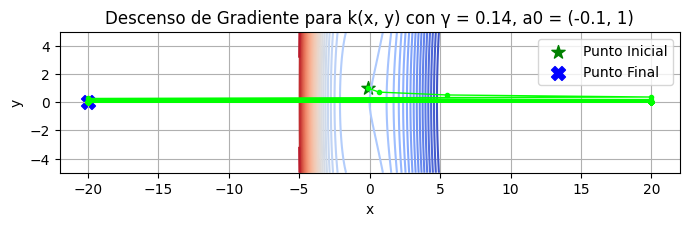

Tasa de aprendizaje: 0.14 - Punto final: [-2.00000000e+001  2.15028701e-143]
el gradiente es: [-5.414  2.   ]
el gradiente es: [-37.14322968   1.4       ]
el gradiente es: [-20.70251248   0.98      ]
el gradiente es: [1.1885498e+03 6.8600000e-01]
el gradiente es: [-3.9848e+04  4.8020e-01]
el gradiente es: [2.3032e+04 3.3614e-01]
el gradiente es: [-3.98480e+04  2.35298e-01]
el gradiente es: [2.303200e+04 1.647086e-01]
el gradiente es: [-3.9848000e+04  1.1529602e-01]
el gradiente es: [2.3032000e+04 8.0707214e-02]
el gradiente es: [-3.98480000e+04  5.64950498e-02]
el gradiente es: [2.30320000e+04 3.95465349e-02]
el gradiente es: [-3.98480000e+04  2.76825744e-02]
el gradiente es: [2.30320000e+04 1.93778021e-02]
el gradiente es: [-3.98480000e+04  1.35644615e-02]
el gradiente es: [2.30320000e+04 9.49512302e-03]
el gradiente es: [-3.98480000e+04  6.64658611e-03]
el gradiente es: [2.30320000e+04 4.65261028e-03]
el gradiente es: [-3.9848000e+04  3.2568272e-03]
el gradiente es: [2.30320000e+04 2

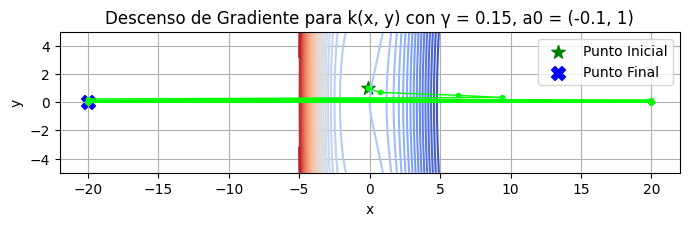

Tasa de aprendizaje: 0.15 - Punto final: [-2.00000000e+001  1.25325664e-155]
el gradiente es: [-5.414  2.   ]
el gradiente es: [-39.98480772   1.36      ]
el gradiente es: [184.28134712   0.9248    ]
el gradiente es: [-3.98480e+04  6.28864e-01]
el gradiente es: [2.3032000e+04 4.2762752e-01]
el gradiente es: [-3.98480000e+04  2.90786714e-01]
el gradiente es: [2.30320000e+04 1.97734965e-01]
el gradiente es: [-3.98480000e+04  1.34459776e-01]
el gradiente es: [2.30320000e+04 9.14326479e-02]
el gradiente es: [-3.98480000e+04  6.21742006e-02]
el gradiente es: [2.30320000e+04 4.22784564e-02]
el gradiente es: [-3.98480000e+04  2.87493504e-02]
el gradiente es: [2.30320000e+04 1.95495582e-02]
el gradiente es: [-3.98480000e+04  1.32936996e-02]
el gradiente es: [2.30320000e+04 9.03971573e-03]
el gradiente es: [-3.9848000e+04  6.1470067e-03]
el gradiente es: [2.30320000e+04 4.17996455e-03]
el gradiente es: [-3.9848000e+04  2.8423759e-03]
el gradiente es: [2.30320000e+04 1.93281561e-03]
el gradiente

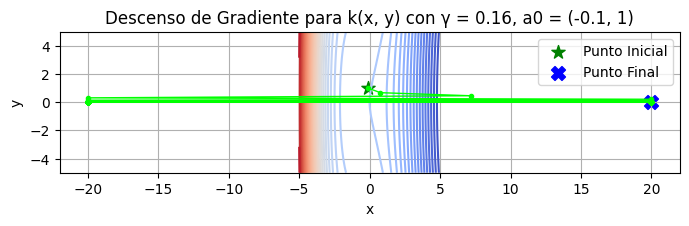

Tasa de aprendizaje: 0.16 - Punto final: [2.00000000e+001 3.22784526e-168]


In [60]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Definición de las variables simbólicas
x, y = sp.symbols('x y', real=True)

# Definición de la función simbólica k(x, y)
k_sym = x**4 - 7*x**3 - 14*x**2 - 8*x + y**2

# Cálculo del gradiente simbólico de k(x, y)
grad_k_sym = sp.Matrix([sp.diff(k_sym, var) for var in (x, y)])

# Crear una función numérica para el gradiente
grad_k_func = sp.lambdify((x, y), grad_k_sym, modules=['numpy'])


def gradient_descent_numeric(grad_func, initial_point, learning_rate, n_iterations=500):
    path = [np.array(initial_point, dtype=float)]
    current_point = np.array(initial_point, dtype=float)
    
    # Definimos límites para x e y, para evitar distorsiones, esto es momentáneo.
    x_min, x_max = -20, 20
    y_min, y_max = -10, 10

    for i in range(n_iterations):
        
        # Calculamos el gradiente en el punto actual
        gradient_eval = grad_func(*current_point)
        gradient_eval = np.array(gradient_eval, dtype=float).flatten()
        print('el gradiente es:', gradient_eval)

        new_point = current_point - learning_rate * gradient_eval

        # Recortar los valores para evitar que se disparen, sin esto da errores.
        # Esto enmascara el problema de la divergencia hacia el infinito, por lo que la gráfica
        # posterior no es fiel a los resultados!
        current_point = np.array([np.clip(new_point[0], x_min, x_max), np.clip(new_point[1], y_min, y_max)])
        #current_point = np.array([new_point[0], new_point[1]])
        
        path.append(current_point)

    return np.array(path)


# "Constantes" para el descenso de gradiente
punto_inicial_k = (-0.1, 1)
learning_rates_k = [0.14, 0.15, 0.16]

# Rangos para graficar
x_plot_k = np.linspace(-5, 5, 100)
y_plot_k = np.linspace(-5, 5, 100)
xg_plot_k, yg_plot_k = np.meshgrid(x_plot_k, y_plot_k)
zk_plot = xg_plot_k**4 - 7*xg_plot_k**3 - 14*xg_plot_k**2 - 8*xg_plot_k + yg_plot_k**2

# Graficar el descenso de gradiente para cada tasa de aprendizaje (son solo 3)
for learning_rate_k in learning_rates_k:
    plt.figure(figsize=(8, 6))
    plt.title(f"Descenso de Gradiente para k(x, y) con γ = {learning_rate_k}, a0 = {punto_inicial_k}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    contour = plt.contour(xg_plot_k, yg_plot_k, zk_plot, levels=50, cmap='coolwarm')

    # Descenso de gradiente
    path_k = gradient_descent_numeric(grad_k_func, punto_inicial_k, learning_rate_k, n_iterations=1000)

    # Graficamos el camino del descenso
    plt.plot(path_k[:, 0], path_k[:, 1], marker='o', linestyle='-', linewidth=1, markersize=3, color='lime')
    plt.scatter(punto_inicial_k[0], punto_inicial_k[1], color='green', marker='*', s=100, label='Punto Inicial')
    plt.scatter(path_k[-1, 0], path_k[-1, 1], color='blue', marker='X', s=100, label='Punto Final')
    plt.legend()
    plt.show()

    # Imprimimos el pto final y la tasa de aprendizaje
    print(f"Tasa de aprendizaje: {learning_rate_k} - Punto final: {path_k[-1]}")

He utilizado ChatGPT para la generación de gran parte de las gráficas, también para solucionar el error de la última celda, que hace que con esa learning_rate, el gráfico tenga un mapa de puntos que divergen hacia el infinito.